In [3]:
pip install tensorflow keras matplotlib scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os

# Mount Google Drive (you may need to manually authenticate in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set dataset directories
dataset_dir = '/content/drive/MyDrive/HARN RICE DS'
healthy_dir = os.path.join(dataset_dir, 'Healthy')
n_def_dir = os.path.join(dataset_dir, 'N_Deficiency')
p_def_dir = os.path.join(dataset_dir, 'P_Deficiency')
k_def_dir = os.path.join(dataset_dir, 'K_Deficiency')

# Image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data augmentation and loading data
datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize the pixel values
    validation_split=0.2,        # Split 20% of the data for validation
    rotation_range=20,           # Data augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # This splits the dataset into training
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # This splits the dataset into validation
)

# CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output for each class
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('plant_nutrient_model.h5')

epochs_range = range(1, epochs + 1)

# Plot accuracy
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Annotate accuracy values
for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy'])):
    plt.text(i + 1, train_acc, f'{train_acc:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + 1, val_acc, f'{val_acc:.2f}', ha='center', va='bottom', fontsize=8, color='orange')

plt.show()

# Plot loss
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Annotate loss values
for i, (train_loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    plt.text(i + 1, train_loss, f'{train_loss:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + 1, val_loss, f'{val_loss:.2f}', ha='center', va='bottom', fontsize=8, color='orange')

plt.show()


ModuleNotFoundError: No module named 'google.colab'

1/1 [==============================] - 0s 109ms/step
Predicted Class: Phosphorus_Deficiency (81.29% confidence)


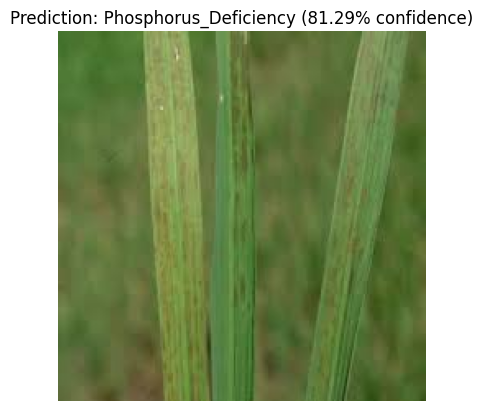

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = tf.keras.models.load_model('plant_nutrient_model.h5')

# Define image size (should match the input size used during model training)
img_height, img_width = 150, 150

# Class labels (adjust these based on your dataset)
class_labels = ['Nitrogen_Deficiency', 'Phosphorus_Deficiency', 'Potassium_Deficiency', 'Healthy']

# Function to load and preprocess the input image
def preprocess_image(image_path):
    # Load the image with target size
    img = load_img(image_path, target_size=(img_height, img_width))

    # Convert image to array
    img_array = img_to_array(img)

    # Rescale pixel values (just like in training)
    img_array = img_array / 255.0

    # Expand dimensions to match the input shape for the model
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Function to predict nutrient deficiency
def predict_nutrient_deficiency(image_path):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the predicted class (highest probability)
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class label
    predicted_label = class_labels[predicted_class_index]

    # Print prediction confidence
    confidence = np.max(predictions[0]) * 100
    print(f"Predicted Class: {predicted_label} ({confidence:.2f}% confidence)")

    # Show the input image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f}% confidence)")
    plt.axis('off')
    plt.show()

# Example Usage
# Provide the path to the leaf image you want to analyze
image_path = '/content/images (1).jpeg'
predict_nutrient_deficiency(image_path)
